In [1]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import pandas as pd
import socket
import matplotlib.pyplot as plt
from itertools import groupby
from shutil import which
import os
import re as re

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(f"Current machine: {socket_name}")
if socket_name == "DESKTOP-5RJD9NC":
    path = "/gitProjects/covid19_data"   # The Path on Harald's machine
if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/covid19_data/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
### Check whether required bins are available
req_bins = ["mafft"] 
for b in req_bins:
    s = which(b)
    if not s:
        print(f"Make sure to install {b} and have in path. I cannot find it!")
        
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

Current machine: compute-a-16-161.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/covid19_data


# Plot Allele Frequencies along the Genome

In [2]:
savepath = "./output/tables/allele_spectrum.tsv"
df1 = pd.read_csv(savepath, sep="\t")
print(f"Loaded {len(df1)} Loci Statistics from {savepath}")

Loaded 29903 Loci Statistics from ./output/tables/allele_spectrum.tsv


Saved to ./figures/dumpster/maf_genome.png


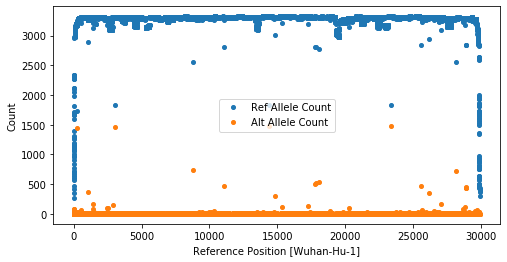

In [3]:
savepath="./figures/dumpster/maf_genome.png"
xlim = []

plt.figure(figsize=(8,4))
ax=plt.gca()
ax.plot(df1["refcount"], "o", label="Ref Allele Count", ms=4)
ax.plot(df1["altcount"], "o", label="Alt Allele Count", ms=4)
ax.set_xlabel("Reference Position [Wuhan-Hu-1]")
ax.set_ylabel("Count")
ax.legend(loc="center")
if len(xlim)>0:
    ax.set_xlim(xlim)
if len(savepath)>0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
    print(f"Saved to {savepath}")
plt.show()

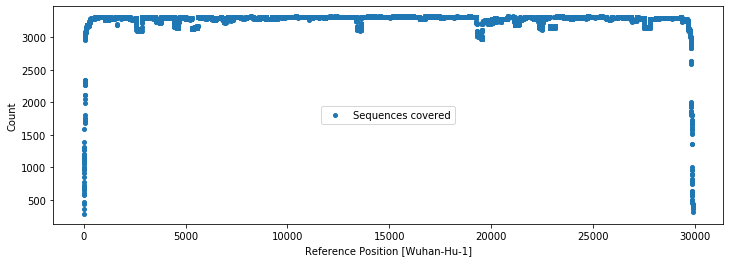

In [4]:
savepath=""
xlim = []

plt.figure(figsize=(12,4))
ax=plt.gca()
ax.plot(df1["refcount"]+df1["altcount"], "o", label="Sequences covered", ms=4)
ax.set_xlabel("Reference Position [Wuhan-Hu-1]")
ax.set_ylabel("Count")
ax.legend(loc="center")
if len(xlim)>0:
    ax.set_xlim(xlim)
if len(savepath)>0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
    print(f"Saved to {savepath}")
plt.show()

### Plot MAF

In [14]:
savepath = "./output/tables/allele_spectrum.tsv"
df1 = pd.read_csv(savepath, sep="\t")
print(f"Loaded {len(df1)} Loci Statistics from {savepath}")
mx_ref = np.max(df1["refcount"])
print(f"Max Ref Count: {mx_ref}")

Loaded 29903 Loci Statistics from ./output/tables/allele_spectrum.tsv
Max Ref Count: 3325


In [15]:
min_count = 1500
maf = 0.05

def extract_var_df(df, min_count=1500, maf=0.05):
    """Extract and return Dataframe with MAF > maf"""
    tot_count = df1["altcount"] + df1["refcount"]
    idx = (df1["altcount"] / tot_count > 0.05) &  (tot_count>min_count)

    print(f"Found {np.sum(idx)} Variants with MAF>{maf}")
    df_var = df1[idx].copy()

    df_var["totcount"] = df_var["refcount"] + df_var["altcount"]
    df_var["maf"] = df_var["altcount"]/df_var["totcount"]
    return df_var

In [16]:
df_var = extract_var_df(df1)

### Which Mutations
mutations = df_var["ref"] + ">" + df_var["alt"]
mutations.value_counts()

Found 18 Variants with MAF>0.05


c>t    9
g>t    3
a>g    2
g>a    2
t>c    1
g>c    1
dtype: int64

In [17]:
### And now save!
savepath = "./output/tables/variant_maf.tsv"
df_var.to_csv(savepath, sep="\t", index=False)
print(f"Saved {len(df_var)} Loci Statistics to {savepath}")

Saved 18 Loci Statistics to ./output/tables/variant_maf.tsv


### Plot Allele Frequency Spectrum

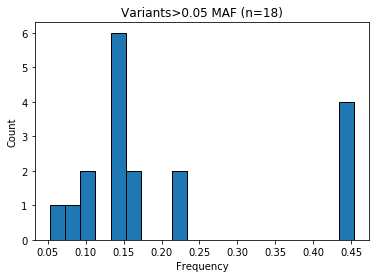

In [18]:
plt.figure()
ax=plt.gca()
ax.hist(df_var["maf"], ec="k", bins=20)
ax.set_xlabel("Frequency")
ax.set_ylabel("Count")
ax.set_title(f"Variants>0.05 MAF (n={len(df_var)})")
plt.show()

In [20]:
### Showcase what variants we have
var_path = "./output/tables/variant_maf.tsv"
df_var = pd.read_csv(var_path, sep="\t")

# Area 51

In [21]:
len(df_var)

18